In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # float iceriyorsa classifier yerine bu , regresyon yapıyoruz zaten sınıflandırma degil 


In [2]:
gold_data = pd.read_csv("gld_price_data.csv")

In [25]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [33]:
gold_data= gold_data.drop(columns=["Date"])

In [35]:
correaliton= gold_data.corr()

<Axes: >

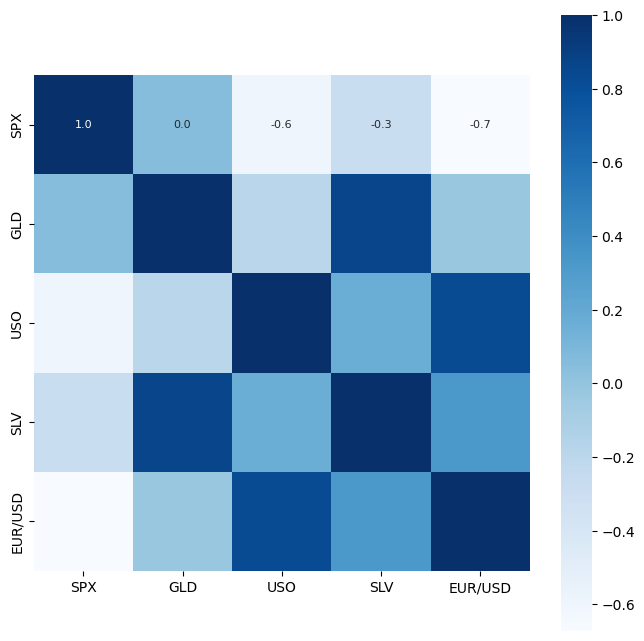

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(correaliton,cbar= True,square=True,fmt=".1f",annot = True, annot_kws={"size":8},cmap="Blues")

In [39]:
print (correaliton["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [41]:
print (correaliton["SPX"])# BÜTÜN DEGERLERE YAPABİLİYORUZ

SPX        1.000000
GLD        0.049345
USO       -0.591573
SLV       -0.274055
EUR/USD   -0.672017
Name: SPX, dtype: float64


## DAGITIM GRAFİĞİ

/var/folders/g7/b1yz35mn0vld78lzsmcmy3q80000gn/T/ipykernel_2397/1957359808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data["GLD"],color="green")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

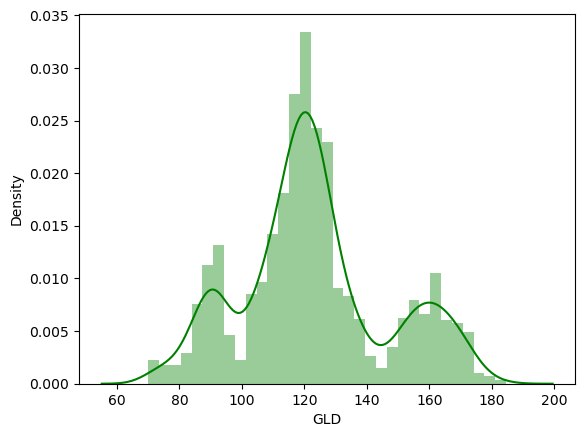

In [43]:
sns.distplot(gold_data["GLD"],color="green")

In [49]:
X = gold_data.drop(["GLD"],axis = 1)

In [51]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [53]:
Y = gold_data["GLD"]

In [55]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [61]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [79]:
model= RandomForestRegressor(n_estimators=100)
# 100 agac sayısına esit daha fazla olursa daha iyi tahmin daha az olursa daha hızlı tahmin ,100 varsayılan

In [85]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [89]:
test_data_prediction=  model.predict(X_test)

In [95]:
error_score= metrics.r2_score(Y_test,test_data_prediction)

In [97]:
error_score

0.9895780061885535

In [101]:
Y_test= list(Y_test)# cizimden önce hata almamak icin

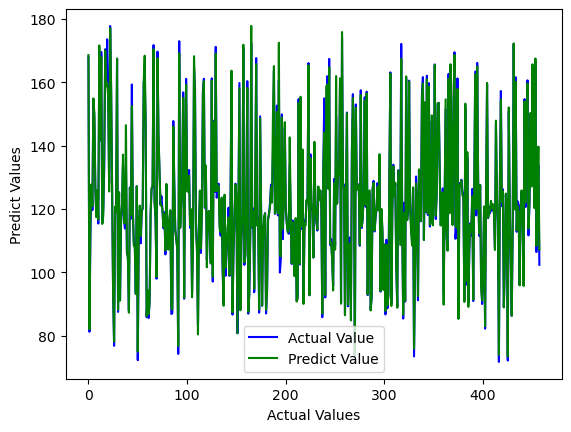

In [115]:
plt.plot(Y_test,color="blue",label = "Actual Value ")
plt.plot(test_data_prediction,color= "green",label= "Predict Value")
plt.xlabel("Actual Values")
plt.ylabel("Predict Values")
plt.legend()#renk bilgisi icin 
plt.show()

